<a href="https://colab.research.google.com/github/danielales/DB_Coderhouse/blob/main/Visualizaci%C3%B3n%2BSuzak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Presentación
Visuzlizaciones de Daniel Suzak

*Data Science I: Fundamentos para la Ciencia de Datos*

Comisión: 61615

Fecha: 05/08/2024

#Antes de los gráficos...

###Primeros pasos

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
from google.colab import drive
%cd '/content/gdrive/MyDrive'

/content/gdrive/MyDrive


###Importo y visualizo los datos

In [12]:
file_path = ('/content/gdrive/MyDrive/CONTAR/BasesCONTAR/conectividad_aerea.csv')
df = pd.read_csv(file_path)
df.head()
#url = 'https://datos.yvera.gob.ar/dataset/c0e7bc3d-553c-405c-8b32-79282b28ffd5/resource/aab49234-28c9-48ab-a978-a83485139290/download/base_microdatos.csv'

,indice_tiempo,clasificacion_vuelo,clase_vuelo,aerolinea,origen_oaci,origen_aeropuerto,origen_localidad,origen_provincia,origen_pais,origen_continente,destino_oaci,destino_aeropuerto,destino_localidad,destino_provincia,destino_pais,destino_continente,pasajeros,asientos,vuelos
0,2017-01-01,Cabotaje,No Regular,Andes Líneas Aéreas,SAAV,Aeropuerto de Sauce Viejo,Santa Fe,Santa Fe,Argentina,América del Sur,SAZS,Aeropuerto Int. Tte. Luis Candelaria,San Carlos de Bariloche,Río Negro,Argentina,América del Sur,85,85,1
1,2017-01-01,Cabotaje,No Regular,Andes Líneas Aéreas,SASA,Aeropuerto Int. Martín Miguel de Güemes,Salta,Salta,Argentina,América del Sur,SASJ,Aeropuerto Int. Gdor. Horacio Guzmán,San Salvador de Jujuy,Jujuy,Argentina,América del Sur,23,83,1
2,2017-01-01,Cabotaje,No Regular,Andes Líneas Aéreas,SAZS,Aeropuerto Int. Tte. Luis Candelaria,San Carlos de Bariloche,Río Negro,Argentina,América del Sur,SAAV,Aeropuerto de Sauce Viejo,Santa Fe,Santa Fe,Argentina,América del Sur,78,83,1
3,2017-01-01,Cabotaje,Regular,Aerolíneas Argentinas,SAAR,Aeropuerto Int. de Rosario Islas Malvinas,Rosario,Santa Fe,Argentina,América del Sur,SACO,Aeropuerto Int. Ingeniero Ambrosio Taravella,Córdoba,Córdoba,Argentina,América del Sur,48,128,1
4,2017-01-01,Cabotaje,Regular,Aerolíneas Argentinas,SAAR,Aeropuerto Int. de Rosario Islas Malvinas,Rosario,Santa Fe,Argentina,América del Sur,SAEZ,Aeropuerto Int. Ministro Pistarini,Ezeiza,Buenos Aires,Argentina,América del Sur,90,128,1


#Matplotlib

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt

##1º Gráfico: Vuelos a BRC por tipo y origen

In [16]:
#Filtro destino BRC
vuelos = df[df['destino_oaci'] == 'SAZS']
#lo voy a usar en otros gráficos

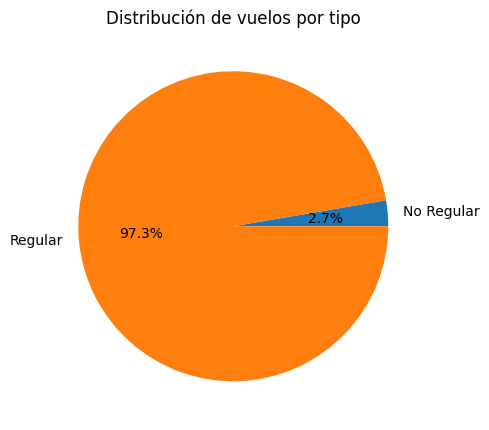

In [ ]:
vuelos_tipovuelo = vuelos.groupby('clase_vuelo')['vuelos'].sum()
plt.figure(figsize=(5, 6))
plt.pie(vuelos_tipovuelo, labels=vuelos_tipovuelo.index, autopct='%1.1f%%')
plt.title('Distribución de vuelos por tipo')
plt.show()

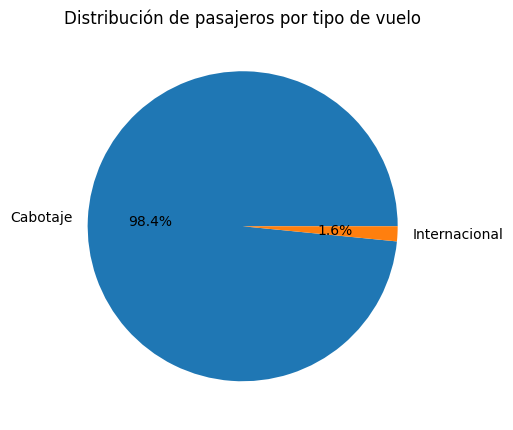

In [ ]:
suma_vuelos_tipovuelo = vuelos.groupby('clasificacion_vuelo')['pasajeros'].sum()
plt.figure(figsize=(5, 6))
plt.pie(suma_vuelos_tipovuelo, labels=suma_vuelos_tipovuelo.index, autopct='%1.1f%%')
plt.title('Distribución de pasajeros por tipo de vuelo')
plt.show()

##2º Gráfico: Top 10 Aerolíneas a BRC por vuelos y pasajeros

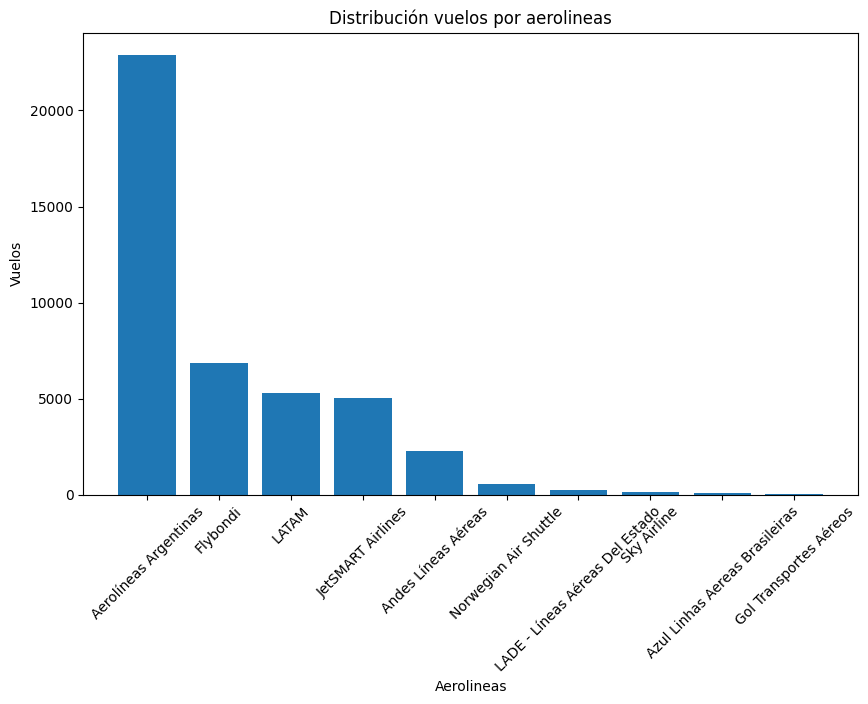

In [ ]:
suma_vuelos_aerolineas = vuelos.groupby('aerolinea')['vuelos'].sum()
suma_vuelos_aerolineas = suma_vuelos_aerolineas.sort_values(ascending=False)
top_vuelos_aerolineas = suma_vuelos_aerolineas.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_vuelos_aerolineas.index, height=top_vuelos_aerolineas.values)
plt.xticks(rotation=45) #inclinación etiquetas
plt.xlabel('Aerolineas')
plt.ylabel('Vuelos')
plt.title('Distribución vuelos por aerolineas')
plt.show()

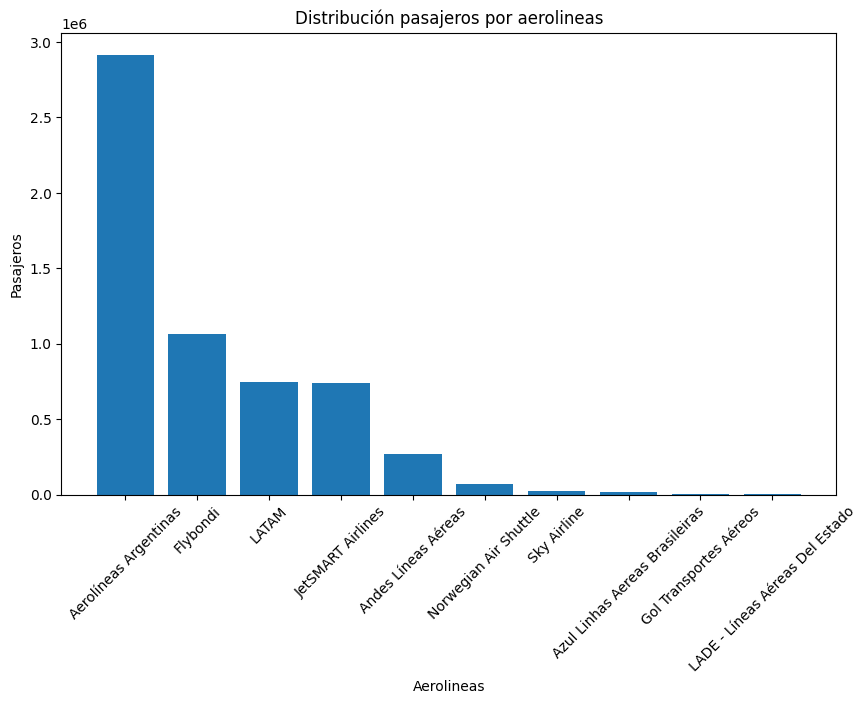

In [ ]:
suma_vuelos_aerolineas = vuelos.groupby('aerolinea')['pasajeros'].sum()
suma_vuelos_aerolineas = suma_vuelos_aerolineas.sort_values(ascending=False)
top_vuelos_aerolineas = suma_vuelos_aerolineas.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_vuelos_aerolineas.index, height=top_vuelos_aerolineas.values)
plt.xticks(rotation=45) #inclinación etiquetas
plt.xlabel('Aerolineas')
plt.ylabel('Pasajeros')
plt.title('Distribución pasajeros por aerolineas')
plt.show()

##3º Gráfico: Vuelos BRC

###Totales (2019-23)

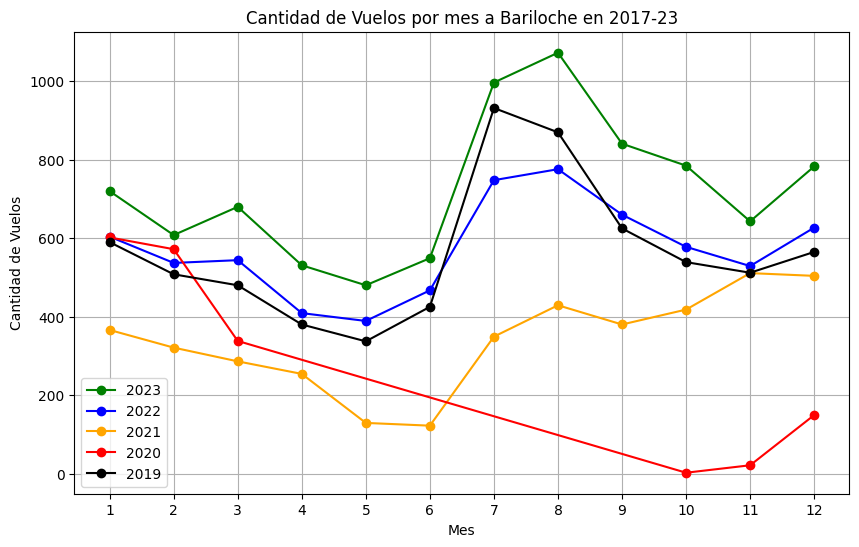

In [17]:
# Fechas en formato datetime
df['indice_tiempo'] = pd.to_datetime(df['indice_tiempo'])

#Filtro por año
data_2023 = vuelos[vuelos['indice_tiempo'].dt.year == 2023]
data_2022 = vuelos[vuelos['indice_tiempo'].dt.year == 2022]
data_2021 = vuelos[vuelos['indice_tiempo'].dt.year == 2021]
data_2020 = vuelos[vuelos['indice_tiempo'].dt.year == 2020]
data_2019 = vuelos[vuelos['indice_tiempo'].dt.year == 2019]

# Agrupo por mes y sumo la cantidad de vuelos

vuelos_por_mes_2023 = data_2023.groupby(data_2023['indice_tiempo'].dt.month)['vuelos'].sum()
vuelos_por_mes_2022 = data_2022.groupby(data_2022['indice_tiempo'].dt.month)['vuelos'].sum()
vuelos_por_mes_2021 = data_2021.groupby(data_2021['indice_tiempo'].dt.month)['vuelos'].sum()
vuelos_por_mes_2020 = data_2020.groupby(data_2020['indice_tiempo'].dt.month)['vuelos'].sum()
vuelos_por_mes_2019 = data_2019.groupby(data_2019['indice_tiempo'].dt.month)['vuelos'].sum()

# Crear la gráfica de líneas
plt.figure(figsize=(10, 6))
vuelos_por_mes_2023.plot( kind='line', marker='o', color='green', label='2023')
vuelos_por_mes_2022.plot( kind='line', marker='o', color='blue', label='2022')
vuelos_por_mes_2021.plot( kind='line', marker='o', color='orange', label='2021')
vuelos_por_mes_2020.plot( kind='line', marker='o', color='red', label='2020')
vuelos_por_mes_2019.plot( kind='line', marker='o', color='black', label='2019')



plt.title('Cantidad de Vuelos por mes a Bariloche en 2017-23')
plt.xlabel('Mes')
plt.legend(loc='lower left')
plt.ylabel('Cantidad de Vuelos')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

###Caída (2019-20)

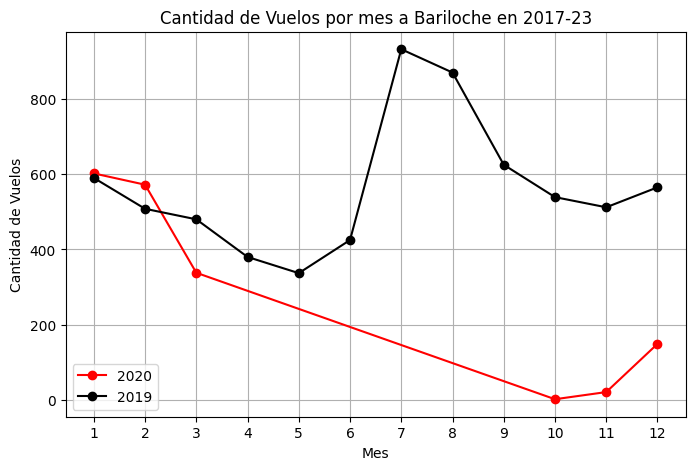

In [19]:
data_2020 = vuelos[vuelos['indice_tiempo'].dt.year == 2020]
data_2019 = vuelos[vuelos['indice_tiempo'].dt.year == 2019]

vuelos_por_mes_2020 = data_2020.groupby(data_2020['indice_tiempo'].dt.month)['vuelos'].sum()
vuelos_por_mes_2019 = data_2019.groupby(data_2019['indice_tiempo'].dt.month)['vuelos'].sum()

plt.figure(figsize=(8, 5))
vuelos_por_mes_2020.plot( kind='line', marker='o', color='red', label='2020')
vuelos_por_mes_2019.plot( kind='line', marker='o', color='black', label='2019')

plt.title('Cantidad de Vuelos por mes a Bariloche en 2017-23')
plt.xlabel('Mes')
plt. legend(loc='lower left')
plt.ylabel('Cantidad de Vuelos')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

###Recuperación (2021-23)

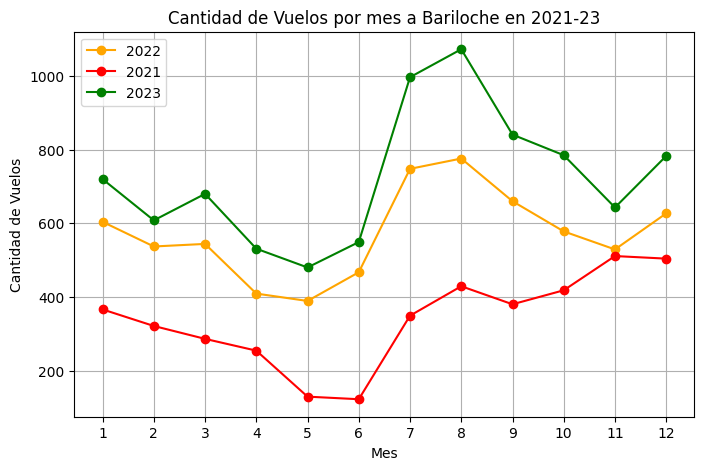

In [18]:
# Fechas en formato datetime
df['indice_tiempo'] = pd.to_datetime(df['indice_tiempo'])

#Filtro por año
data_2021 = vuelos[vuelos['indice_tiempo'].dt.year == 2021]
data_2022 = vuelos[vuelos['indice_tiempo'].dt.year == 2022]
data_2023 = vuelos[vuelos['indice_tiempo'].dt.year == 2023]

# Agrupo por mes y sumo la cantidad de vuelos
vuelos_por_mes_2022 = data_2022.groupby(data_2022['indice_tiempo'].dt.month)['vuelos'].sum()
vuelos_por_mes_2021 = data_2021.groupby(data_2021['indice_tiempo'].dt.month)['vuelos'].sum()
vuelos_por_mes_2023 = data_2023.groupby(data_2023['indice_tiempo'].dt.month)['vuelos'].sum()

# Crear la gráfica de líneas
plt.figure(figsize=(8, 5))

vuelos_por_mes_2022.plot( kind='line', marker='o', color='orange', label='2022')
vuelos_por_mes_2021.plot( kind='line', marker='o', color='red', label='2021')
vuelos_por_mes_2023.plot( kind='line', marker='o', color='green', label='2023')

plt.title('Cantidad de Vuelos por mes a Bariloche en 2021-23')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Vuelos')
plt. legend(loc='upper left')
plt.grid(True)
plt.xticks(range(1, 13))  # Asegurarse de que los meses se muestren correctamente
plt.show()

#Seaborn

###1º Gráfico: Origen vuelos a BRC

In [21]:
import seaborn as sns

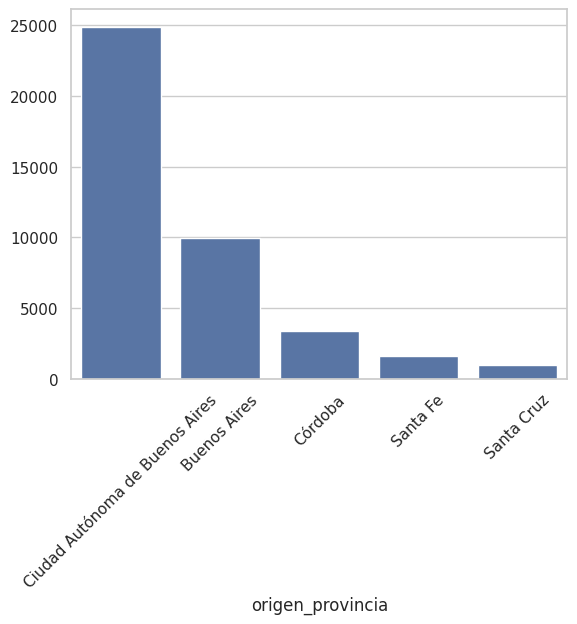

In [38]:
vuelos_origen = vuelos.groupby('origen_provincia')['vuelos'].sum()
vuelos_origen = vuelos_origen.sort_values(ascending=False)
top_vuelos_origen = vuelos_origen.head(5)
sns.barplot(x=top_vuelos_origen.index, y=top_vuelos_origen.values)
plt.xticks(rotation=45)
plt.show()

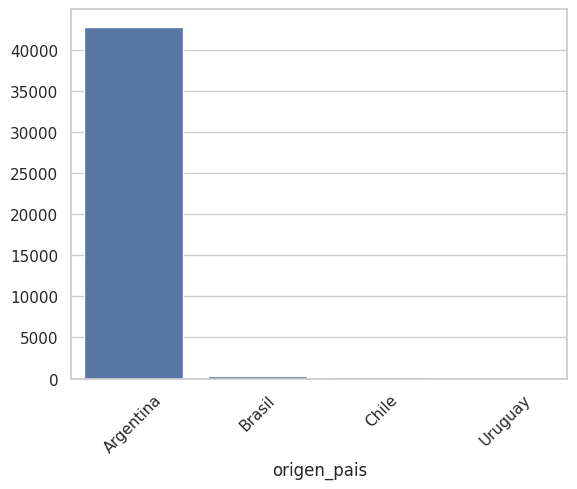

In [37]:
sns.set_theme(style="whitegrid")
vuelos_origen = vuelos.groupby('origen_pais')['vuelos'].sum()
sns.barplot(x=vuelos_origen.index, y=vuelos_origen.values)
plt.xticks(rotation=45)
plt.show()

###2º Gráfico: Vuelos Semanales de 2023

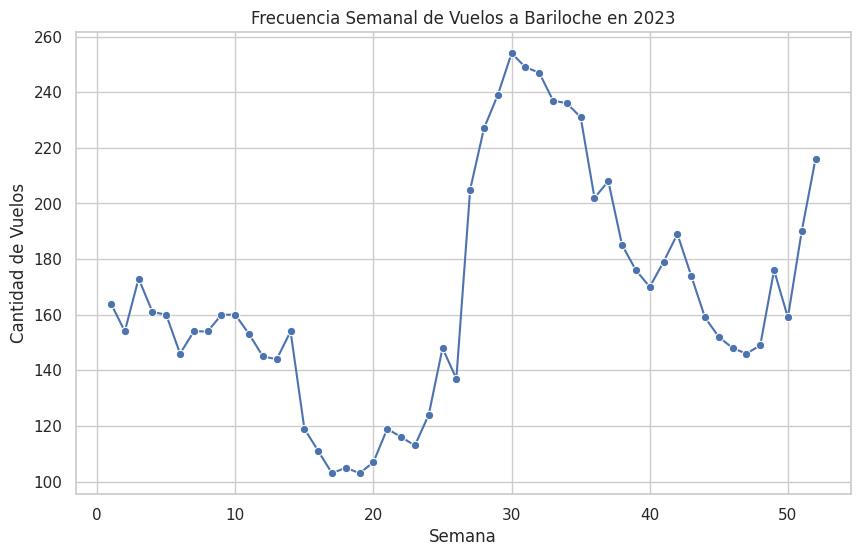

In [43]:
vuelos_2023 = vuelos[vuelos['indice_tiempo'].dt.year == 2023]

vuelos_semanales = vuelos_2023.groupby(vuelos_2023['indice_tiempo'].dt.isocalendar().week)['vuelos'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=vuelos_semanales.index, y=vuelos_semanales.values, marker='o')
plt.title('Frecuencia Semanal de Vuelos a Bariloche en 2023')
plt.xlabel('Semana')
plt.ylabel('Cantidad de Vuelos')
plt.grid(True)
plt.show()

###3º Gráfico: Pasajeros por vuelo 2023 - Estadísticos

In [64]:
vuelos_2023 = vuelos[vuelos['indice_tiempo'].dt.year == 2023]
vuelos_2023['pasajeros'].describe()

,pasajeros
count,4123.000000
mean,306.421538
std,282.069034
min,1.000000
25%,138.000000
50%,180.000000
75%,378.000000
max,2223.000000


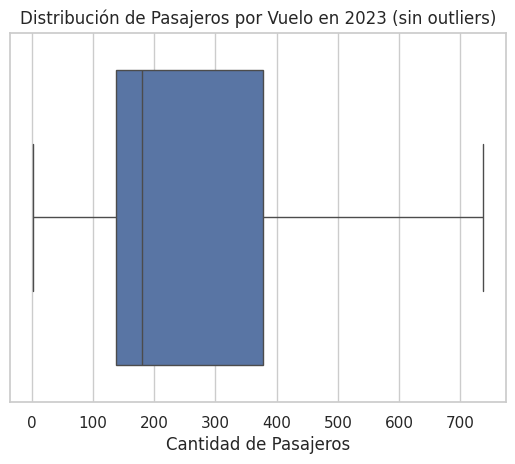

In [54]:
#BoxPlot
sns.boxplot(x=vuelos_2023['pasajeros'], showfliers=False)
plt.title('Distribución de Pasajeros por Vuelo en 2023 (sin outliers)')
plt.xlabel('Cantidad de Pasajeros')
plt.show()

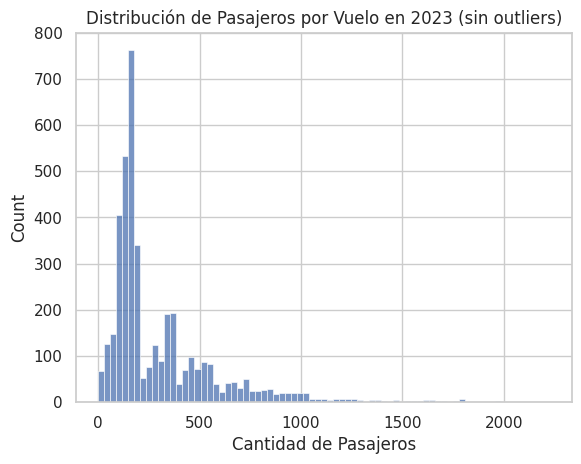

In [59]:
#Histograma
sns.histplot(x=vuelos_2023['pasajeros'])
plt.title('Distribución de Pasajeros por Vuelo en 2023 (sin outliers)')
plt.xlabel('Cantidad de Pasajeros')
plt.show()